In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MLSP Project

/content/drive/.shortcut-targets-by-id/1RRHEJcfpBYaw3CTz-ozpHlPihKr-JXpC/MLSP Project


In [ ]:
!pip install medmnist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 8.5 MB/s eta 0:00:00


In [ ]:
# import importlib

In [ ]:
# import utils.classifier_logger
# importlib.reload(utils.classifier_logger)

<module 'utils.classifier_logger' from '/content/drive/.shortcut-targets-by-id/1RRHEJcfpBYaw3CTz-ozpHlPihKr-JXpC/MLSP Project/utils/classifier_logger.py'>

In [ ]:
from torch.utils.data import DataLoader, ConcatDataset

from data.load_data import load_medmnist_dataset, sample_subset
from data.generate_data import generate_samples, GenDataset

from models.diffusion import build_ddpm_model
from models.classifier import CNN, MLP
from train.diffusion_trainer import train_ddpm
from train.classifier_trainer import train_classifier
from utils.diffusion_logger import plot_ddpm_training_loss
from utils.classifier_logger import plot_classifier_log


In [ ]:

size = 128

# Load MedMNIST dataset
train_dataset_total, test_dataset = load_medmnist_dataset(size)
train_dataset = sample_subset(train_dataset_total, total_samples = 120, label_ratio=(0.5, 0.5))

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=2*16, shuffle=False)

# Build and train DDPM model
ddpm_model = build_ddpm_model(size)

train_ddpm(ddpm_model, train_loader, epochs = 0, checkpoint_dir = "results/diffusion_checkpoints", resume_file = "latest.pt")

# # Plot training loss
# plot_ddpm_training_loss(ddpm_model)


100%|██████████| 11.0M/11.0M [00:01<00:00, 6.89MB/s]


Checkpoint loaded from: results/diffusion_checkpoints/latest.pt | Resume from epoch 50


Checkpoint loaded from: results/diffusion_checkpoints/latest.pt | Resume from epoch 50


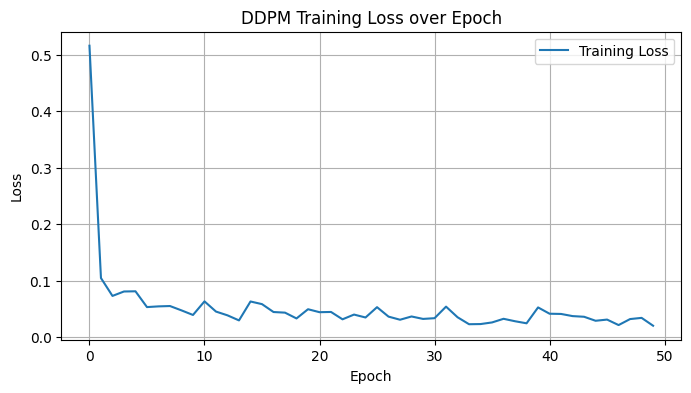

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_ddpm_training_loss(ddpm_model)

In [ ]:
# Generate synthetic dataset
save_dir = "results/generated_img"
generate_samples(ddpm_model, num_samples = 0, label_ratio = (0.5, 0.5), save_dir = save_dir)
gen_dataset = GenDataset(folder = save_dir)

# Combine real and synthetic datasets
train_dataset_aug = ConcatDataset([train_dataset, gen_dataset])
train_loader_aug = DataLoader(train_dataset_aug, batch_size=16, shuffle=True)


In [ ]:
# Build and train classifier (aug)
classifier = CNN()
train_classifier(classifier, train_loader_aug, num_epochs=100, train_loader_raw=train_loader, test_loader=test_loader, log_path="results/cnn")


Epoch 1: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s, loss=0.6954]


Train ACC: 0.500, Test ACC: 0.269


Epoch 2: 100%|██████████| 15/15 [00:00<00:00, 31.39it/s, loss=0.6304]


Train ACC: 0.500, Test ACC: 0.269


Epoch 3: 100%|██████████| 15/15 [00:00<00:00, 31.06it/s, loss=0.4899]


Train ACC: 0.500, Test ACC: 0.269


Epoch 4: 100%|██████████| 15/15 [00:00<00:00, 30.47it/s, loss=0.3965]


Train ACC: 0.833, Test ACC: 0.468


Epoch 5: 100%|██████████| 15/15 [00:00<00:00, 31.88it/s, loss=0.3730]


Train ACC: 0.783, Test ACC: 0.372


Epoch 6: 100%|██████████| 15/15 [00:00<00:00, 29.95it/s, loss=0.4676]


Train ACC: 0.633, Test ACC: 0.333


Epoch 7: 100%|██████████| 15/15 [00:00<00:00, 27.36it/s, loss=0.2939]


Train ACC: 0.983, Test ACC: 0.776


Epoch 8: 100%|██████████| 15/15 [00:00<00:00, 31.09it/s, loss=0.1140]


Train ACC: 0.992, Test ACC: 0.635


Epoch 9: 100%|██████████| 15/15 [00:00<00:00, 32.41it/s, loss=0.0404]


Train ACC: 1.000, Test ACC: 0.603


Epoch 10: 100%|██████████| 15/15 [00:00<00:00, 28.77it/s, loss=0.0142]


Train ACC: 1.000, Test ACC: 0.679


Epoch 11: 100%|██████████| 15/15 [00:00<00:00, 28.69it/s, loss=0.0071]


Train ACC: 1.000, Test ACC: 0.654


Epoch 12: 100%|██████████| 15/15 [00:00<00:00, 28.04it/s, loss=0.0076]


Train ACC: 1.000, Test ACC: 0.731


Epoch 13: 100%|██████████| 15/15 [00:00<00:00, 29.58it/s, loss=0.0063]


Train ACC: 1.000, Test ACC: 0.628


Epoch 14: 100%|██████████| 15/15 [00:00<00:00, 29.11it/s, loss=0.0037]


Train ACC: 1.000, Test ACC: 0.686


Epoch 15: 100%|██████████| 15/15 [00:00<00:00, 27.27it/s, loss=0.0042]


Train ACC: 1.000, Test ACC: 0.628


Epoch 16: 100%|██████████| 15/15 [00:00<00:00, 28.01it/s, loss=0.0039]


Train ACC: 1.000, Test ACC: 0.705


Epoch 17: 100%|██████████| 15/15 [00:00<00:00, 30.69it/s, loss=0.0024]


Train ACC: 1.000, Test ACC: 0.660


Epoch 18: 100%|██████████| 15/15 [00:00<00:00, 29.62it/s, loss=0.0024]


Train ACC: 1.000, Test ACC: 0.660


Epoch 19: 100%|██████████| 15/15 [00:00<00:00, 30.43it/s, loss=0.0023]


Train ACC: 1.000, Test ACC: 0.699


Epoch 20: 100%|██████████| 15/15 [00:00<00:00, 28.44it/s, loss=0.0024]


Train ACC: 1.000, Test ACC: 0.686


In [ ]:
# Build and train classifier (raw)
classifier = CNN()
train_classifier(classifier, train_loader, num_epochs=100, train_loader_raw=train_loader, test_loader=test_loader, log_path="results/cnn")


Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 70.39it/s, loss=1.0155]


Train ACC: 0.500, Test ACC: 0.731


Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 74.76it/s, loss=0.8047]


Train ACC: 0.500, Test ACC: 0.731


Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 74.71it/s, loss=0.8600]


Train ACC: 0.500, Test ACC: 0.731


Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 74.64it/s, loss=0.8466]


Train ACC: 0.500, Test ACC: 0.731


Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 75.92it/s, loss=0.7003]


Train ACC: 0.500, Test ACC: 0.731


Epoch 6: 100%|██████████| 8/8 [00:00<00:00, 76.32it/s, loss=0.7339]


Train ACC: 0.583, Test ACC: 0.750


Epoch 7: 100%|██████████| 8/8 [00:00<00:00, 77.67it/s, loss=0.6385]


Train ACC: 0.558, Test ACC: 0.744


Epoch 8: 100%|██████████| 8/8 [00:00<00:00, 74.80it/s, loss=0.6865]


Train ACC: 0.775, Test ACC: 0.756


Epoch 9: 100%|██████████| 8/8 [00:00<00:00, 77.18it/s, loss=0.5605]


Train ACC: 0.642, Test ACC: 0.756


Epoch 10: 100%|██████████| 8/8 [00:00<00:00, 75.17it/s, loss=0.7274]


Train ACC: 0.792, Test ACC: 0.769


Epoch 11: 100%|██████████| 8/8 [00:00<00:00, 75.64it/s, loss=0.5261]


Train ACC: 0.883, Test ACC: 0.724


Epoch 12: 100%|██████████| 8/8 [00:00<00:00, 75.68it/s, loss=0.3806]


Train ACC: 0.783, Test ACC: 0.769


Epoch 13: 100%|██████████| 8/8 [00:00<00:00, 78.26it/s, loss=0.4307]


Train ACC: 0.908, Test ACC: 0.782


Epoch 14: 100%|██████████| 8/8 [00:00<00:00, 75.94it/s, loss=0.2940]


Train ACC: 0.992, Test ACC: 0.744


Epoch 15: 100%|██████████| 8/8 [00:00<00:00, 75.75it/s, loss=0.1360]


Train ACC: 1.000, Test ACC: 0.737


Epoch 16: 100%|██████████| 8/8 [00:00<00:00, 75.75it/s, loss=0.0691]


Train ACC: 1.000, Test ACC: 0.756


Epoch 17: 100%|██████████| 8/8 [00:00<00:00, 75.84it/s, loss=0.0330]


Train ACC: 1.000, Test ACC: 0.750


Epoch 18: 100%|██████████| 8/8 [00:00<00:00, 76.99it/s, loss=0.0198]


Train ACC: 1.000, Test ACC: 0.737


Epoch 19: 100%|██████████| 8/8 [00:00<00:00, 75.92it/s, loss=0.0134]


Train ACC: 1.000, Test ACC: 0.750


Epoch 20: 100%|██████████| 8/8 [00:00<00:00, 77.00it/s, loss=0.0100]

Train ACC: 1.000, Test ACC: 0.744


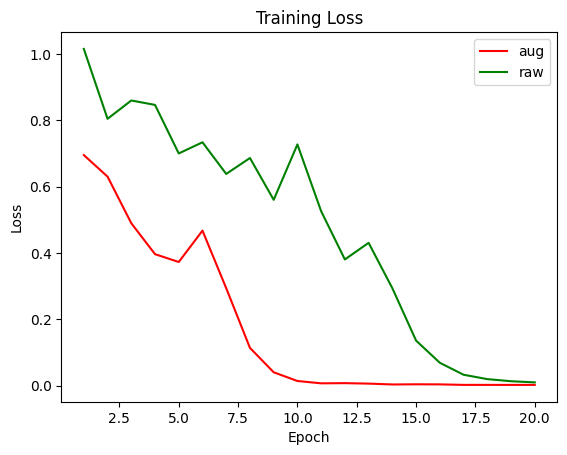

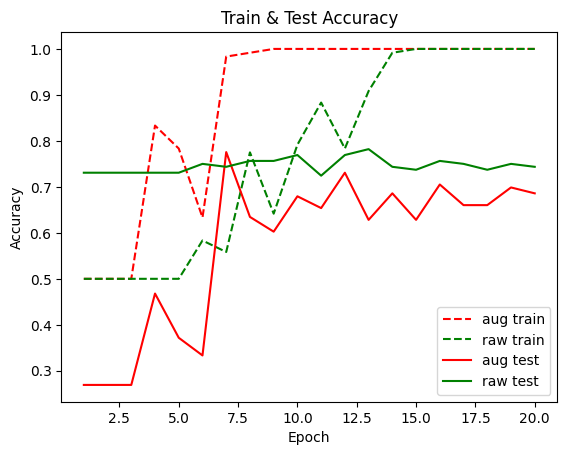

In [ ]:
plot_classifier_log(log_path="results/cnn")

In [ ]:
# aug
classifier = MLP()
train_classifier(classifier, train_loader_aug, num_epochs=100, train_loader_raw=train_loader, test_loader=test_loader, log_path="results/mlp")


Epoch 1: 100%|██████████| 15/15 [00:00<00:00, 41.03it/s, loss=0.6954]


Train ACC: 0.517, Test ACC: 0.269


Epoch 2: 100%|██████████| 15/15 [00:00<00:00, 41.05it/s, loss=0.6797]


Train ACC: 0.625, Test ACC: 0.385


Epoch 3: 100%|██████████| 15/15 [00:00<00:00, 41.41it/s, loss=0.6572]


Train ACC: 0.725, Test ACC: 0.609


Epoch 4: 100%|██████████| 15/15 [00:00<00:00, 40.73it/s, loss=0.6369]


Train ACC: 0.725, Test ACC: 0.551


Epoch 5: 100%|██████████| 15/15 [00:00<00:00, 39.94it/s, loss=0.6251]


Train ACC: 0.775, Test ACC: 0.705


Epoch 6: 100%|██████████| 15/15 [00:00<00:00, 36.07it/s, loss=0.5945]


Train ACC: 0.825, Test ACC: 0.737


Epoch 7: 100%|██████████| 15/15 [00:00<00:00, 36.98it/s, loss=0.5799]


Train ACC: 0.742, Test ACC: 0.635


Epoch 8: 100%|██████████| 15/15 [00:00<00:00, 40.84it/s, loss=0.5587]


Train ACC: 0.733, Test ACC: 0.545


Epoch 9: 100%|██████████| 15/15 [00:00<00:00, 38.55it/s, loss=0.5572]


Train ACC: 0.725, Test ACC: 0.776


Epoch 10: 100%|██████████| 15/15 [00:00<00:00, 35.67it/s, loss=0.5362]


Train ACC: 0.817, Test ACC: 0.763


Epoch 11: 100%|██████████| 15/15 [00:00<00:00, 38.05it/s, loss=0.4920]


Train ACC: 0.867, Test ACC: 0.699


Epoch 12: 100%|██████████| 15/15 [00:00<00:00, 42.80it/s, loss=0.4715]


Train ACC: 0.817, Test ACC: 0.756


Epoch 13: 100%|██████████| 15/15 [00:00<00:00, 39.73it/s, loss=0.4592]


Train ACC: 0.817, Test ACC: 0.763


Epoch 14: 100%|██████████| 15/15 [00:00<00:00, 42.48it/s, loss=0.4084]


Train ACC: 0.883, Test ACC: 0.699


Epoch 15: 100%|██████████| 15/15 [00:00<00:00, 43.73it/s, loss=0.3724]


Train ACC: 0.883, Test ACC: 0.705


Epoch 16: 100%|██████████| 15/15 [00:00<00:00, 42.12it/s, loss=0.3521]


Train ACC: 0.917, Test ACC: 0.718


Epoch 17: 100%|██████████| 15/15 [00:00<00:00, 44.13it/s, loss=0.3148]


Train ACC: 0.933, Test ACC: 0.692


Epoch 18: 100%|██████████| 15/15 [00:00<00:00, 42.91it/s, loss=0.3030]


Train ACC: 0.942, Test ACC: 0.686


Epoch 19: 100%|██████████| 15/15 [00:00<00:00, 40.95it/s, loss=0.2511]


Train ACC: 0.975, Test ACC: 0.673


Epoch 20: 100%|██████████| 15/15 [00:00<00:00, 39.33it/s, loss=0.2203]


Train ACC: 0.925, Test ACC: 0.705


Epoch 21: 100%|██████████| 15/15 [00:00<00:00, 39.49it/s, loss=0.2615]


Train ACC: 0.567, Test ACC: 0.705


Epoch 22: 100%|██████████| 15/15 [00:00<00:00, 43.29it/s, loss=0.3724]


Train ACC: 0.950, Test ACC: 0.686


Epoch 23: 100%|██████████| 15/15 [00:00<00:00, 42.25it/s, loss=0.2057]


Train ACC: 0.983, Test ACC: 0.660


Epoch 24: 100%|██████████| 15/15 [00:00<00:00, 41.73it/s, loss=0.1482]


Train ACC: 0.992, Test ACC: 0.686


Epoch 25: 100%|██████████| 15/15 [00:00<00:00, 41.35it/s, loss=0.1322]


Train ACC: 0.908, Test ACC: 0.731


Epoch 26: 100%|██████████| 15/15 [00:00<00:00, 42.64it/s, loss=0.1491]


Train ACC: 0.975, Test ACC: 0.712


Epoch 27: 100%|██████████| 15/15 [00:00<00:00, 37.93it/s, loss=0.1231]


Train ACC: 1.000, Test ACC: 0.647


Epoch 28: 100%|██████████| 15/15 [00:00<00:00, 40.64it/s, loss=0.1287]


Train ACC: 1.000, Test ACC: 0.679


Epoch 29: 100%|██████████| 15/15 [00:00<00:00, 38.12it/s, loss=0.1031]


Train ACC: 0.967, Test ACC: 0.737


Epoch 30: 100%|██████████| 15/15 [00:00<00:00, 41.58it/s, loss=0.0622]


Train ACC: 1.000, Test ACC: 0.679


Epoch 31: 100%|██████████| 15/15 [00:00<00:00, 41.91it/s, loss=0.0491]


Train ACC: 1.000, Test ACC: 0.699


Epoch 32: 100%|██████████| 15/15 [00:00<00:00, 39.67it/s, loss=0.0425]


Train ACC: 1.000, Test ACC: 0.660


Epoch 33: 100%|██████████| 15/15 [00:00<00:00, 40.35it/s, loss=0.0391]


Train ACC: 1.000, Test ACC: 0.654


Epoch 34: 100%|██████████| 15/15 [00:00<00:00, 40.96it/s, loss=0.0372]


Train ACC: 1.000, Test ACC: 0.667


Epoch 35: 100%|██████████| 15/15 [00:00<00:00, 42.78it/s, loss=0.0318]


Train ACC: 1.000, Test ACC: 0.654


Epoch 36: 100%|██████████| 15/15 [00:00<00:00, 39.59it/s, loss=0.0286]


Train ACC: 1.000, Test ACC: 0.654


Epoch 37: 100%|██████████| 15/15 [00:00<00:00, 36.69it/s, loss=0.0276]


Train ACC: 1.000, Test ACC: 0.654


Epoch 38: 100%|██████████| 15/15 [00:00<00:00, 36.99it/s, loss=0.0254]


Train ACC: 1.000, Test ACC: 0.647


Epoch 39: 100%|██████████| 15/15 [00:00<00:00, 39.83it/s, loss=0.0239]


Train ACC: 1.000, Test ACC: 0.705


Epoch 40: 100%|██████████| 15/15 [00:00<00:00, 40.93it/s, loss=0.0197]


Train ACC: 1.000, Test ACC: 0.712


Epoch 41: 100%|██████████| 15/15 [00:00<00:00, 38.07it/s, loss=0.0230]


Train ACC: 1.000, Test ACC: 0.699


Epoch 42: 100%|██████████| 15/15 [00:00<00:00, 41.33it/s, loss=0.0169]


Train ACC: 1.000, Test ACC: 0.660


Epoch 43: 100%|██████████| 15/15 [00:00<00:00, 42.33it/s, loss=0.0151]


Train ACC: 1.000, Test ACC: 0.673


Epoch 44: 100%|██████████| 15/15 [00:00<00:00, 40.71it/s, loss=0.0140]


Train ACC: 1.000, Test ACC: 0.654


Epoch 45: 100%|██████████| 15/15 [00:00<00:00, 38.44it/s, loss=0.0135]


Train ACC: 1.000, Test ACC: 0.679


Epoch 46: 100%|██████████| 15/15 [00:00<00:00, 41.37it/s, loss=0.0132]


Train ACC: 1.000, Test ACC: 0.679


Epoch 47: 100%|██████████| 15/15 [00:00<00:00, 40.46it/s, loss=0.0116]


Train ACC: 1.000, Test ACC: 0.654


Epoch 48: 100%|██████████| 15/15 [00:00<00:00, 37.65it/s, loss=0.0119]


Train ACC: 1.000, Test ACC: 0.654


Epoch 49: 100%|██████████| 15/15 [00:00<00:00, 40.11it/s, loss=0.0114]


Train ACC: 1.000, Test ACC: 0.647


Epoch 50: 100%|██████████| 15/15 [00:00<00:00, 36.92it/s, loss=0.0106]


Train ACC: 1.000, Test ACC: 0.673


Epoch 51: 100%|██████████| 15/15 [00:00<00:00, 38.59it/s, loss=0.0093]


Train ACC: 1.000, Test ACC: 0.654


Epoch 52: 100%|██████████| 15/15 [00:00<00:00, 41.31it/s, loss=0.0090]


Train ACC: 1.000, Test ACC: 0.654


Epoch 53: 100%|██████████| 15/15 [00:00<00:00, 41.69it/s, loss=0.0087]


Train ACC: 1.000, Test ACC: 0.673


Epoch 54: 100%|██████████| 15/15 [00:00<00:00, 41.21it/s, loss=0.0084]


Train ACC: 1.000, Test ACC: 0.660


Epoch 55: 100%|██████████| 15/15 [00:00<00:00, 42.38it/s, loss=0.0081]


Train ACC: 1.000, Test ACC: 0.654


Epoch 56: 100%|██████████| 15/15 [00:00<00:00, 42.93it/s, loss=0.0077]


Train ACC: 1.000, Test ACC: 0.679


Epoch 57: 100%|██████████| 15/15 [00:00<00:00, 42.85it/s, loss=0.0074]


Train ACC: 1.000, Test ACC: 0.654


Epoch 58: 100%|██████████| 15/15 [00:00<00:00, 42.26it/s, loss=0.0071]


Train ACC: 1.000, Test ACC: 0.660


Epoch 59: 100%|██████████| 15/15 [00:00<00:00, 38.74it/s, loss=0.0069]


Train ACC: 1.000, Test ACC: 0.679


Epoch 60: 100%|██████████| 15/15 [00:00<00:00, 41.80it/s, loss=0.0066]


Train ACC: 1.000, Test ACC: 0.660


Epoch 61: 100%|██████████| 15/15 [00:00<00:00, 40.50it/s, loss=0.0064]


Train ACC: 1.000, Test ACC: 0.673


Epoch 62: 100%|██████████| 15/15 [00:00<00:00, 39.00it/s, loss=0.0063]


Train ACC: 1.000, Test ACC: 0.654


Epoch 63: 100%|██████████| 15/15 [00:00<00:00, 41.02it/s, loss=0.0059]


Train ACC: 1.000, Test ACC: 0.673


Epoch 64: 100%|██████████| 15/15 [00:00<00:00, 39.44it/s, loss=0.0058]


Train ACC: 1.000, Test ACC: 0.660


Epoch 65: 100%|██████████| 15/15 [00:00<00:00, 38.15it/s, loss=0.0054]


Train ACC: 1.000, Test ACC: 0.673


Epoch 66: 100%|██████████| 15/15 [00:00<00:00, 42.55it/s, loss=0.0053]


Train ACC: 1.000, Test ACC: 0.667


Epoch 67: 100%|██████████| 15/15 [00:00<00:00, 42.37it/s, loss=0.0051]


Train ACC: 1.000, Test ACC: 0.660


Epoch 68: 100%|██████████| 15/15 [00:00<00:00, 41.70it/s, loss=0.0050]


Train ACC: 1.000, Test ACC: 0.667


Epoch 69: 100%|██████████| 15/15 [00:00<00:00, 41.80it/s, loss=0.0048]


Train ACC: 1.000, Test ACC: 0.654


Epoch 70: 100%|██████████| 15/15 [00:00<00:00, 41.48it/s, loss=0.0046]


Train ACC: 1.000, Test ACC: 0.660


Epoch 71: 100%|██████████| 15/15 [00:00<00:00, 40.31it/s, loss=0.0045]


Train ACC: 1.000, Test ACC: 0.654


Epoch 72: 100%|██████████| 15/15 [00:00<00:00, 38.35it/s, loss=0.0044]


Train ACC: 1.000, Test ACC: 0.660


Epoch 73: 100%|██████████| 15/15 [00:00<00:00, 38.23it/s, loss=0.0043]


Train ACC: 1.000, Test ACC: 0.654


Epoch 74: 100%|██████████| 15/15 [00:00<00:00, 43.49it/s, loss=0.0042]


Train ACC: 1.000, Test ACC: 0.654


Epoch 75: 100%|██████████| 15/15 [00:00<00:00, 43.92it/s, loss=0.0041]


Train ACC: 1.000, Test ACC: 0.673


Epoch 76: 100%|██████████| 15/15 [00:00<00:00, 42.30it/s, loss=0.0040]


Train ACC: 1.000, Test ACC: 0.654


Epoch 77: 100%|██████████| 15/15 [00:00<00:00, 40.53it/s, loss=0.0039]


Train ACC: 1.000, Test ACC: 0.679


Epoch 78: 100%|██████████| 15/15 [00:00<00:00, 45.42it/s, loss=0.0038]


Train ACC: 1.000, Test ACC: 0.654


Epoch 79: 100%|██████████| 15/15 [00:00<00:00, 41.78it/s, loss=0.0037]


Train ACC: 1.000, Test ACC: 0.654


Epoch 80: 100%|██████████| 15/15 [00:00<00:00, 42.99it/s, loss=0.0036]


Train ACC: 1.000, Test ACC: 0.654


Epoch 81: 100%|██████████| 15/15 [00:00<00:00, 40.13it/s, loss=0.0036]


Train ACC: 1.000, Test ACC: 0.667


Epoch 82: 100%|██████████| 15/15 [00:00<00:00, 42.43it/s, loss=0.0035]


Train ACC: 1.000, Test ACC: 0.654


Epoch 83: 100%|██████████| 15/15 [00:00<00:00, 39.49it/s, loss=0.0034]


Train ACC: 1.000, Test ACC: 0.654


Epoch 84: 100%|██████████| 15/15 [00:00<00:00, 36.69it/s, loss=0.0034]


Train ACC: 1.000, Test ACC: 0.667


Epoch 85: 100%|██████████| 15/15 [00:00<00:00, 40.87it/s, loss=0.0032]


Train ACC: 1.000, Test ACC: 0.654


Epoch 86: 100%|██████████| 15/15 [00:00<00:00, 42.32it/s, loss=0.0031]


Train ACC: 1.000, Test ACC: 0.679


Epoch 87: 100%|██████████| 15/15 [00:00<00:00, 41.61it/s, loss=0.0031]


Train ACC: 1.000, Test ACC: 0.654


Epoch 88: 100%|██████████| 15/15 [00:00<00:00, 39.61it/s, loss=0.0030]


Train ACC: 1.000, Test ACC: 0.660


Epoch 89: 100%|██████████| 15/15 [00:00<00:00, 38.85it/s, loss=0.0030]


Train ACC: 1.000, Test ACC: 0.654


Epoch 90: 100%|██████████| 15/15 [00:00<00:00, 40.23it/s, loss=0.0029]


Train ACC: 1.000, Test ACC: 0.654


Epoch 91: 100%|██████████| 15/15 [00:00<00:00, 38.88it/s, loss=0.0029]


Train ACC: 1.000, Test ACC: 0.673


Epoch 92: 100%|██████████| 15/15 [00:00<00:00, 37.08it/s, loss=0.0028]


Train ACC: 1.000, Test ACC: 0.654


Epoch 93: 100%|██████████| 15/15 [00:00<00:00, 36.50it/s, loss=0.0028]


Train ACC: 1.000, Test ACC: 0.673


Epoch 94: 100%|██████████| 15/15 [00:00<00:00, 40.63it/s, loss=0.0027]


Train ACC: 1.000, Test ACC: 0.654


Epoch 95: 100%|██████████| 15/15 [00:00<00:00, 44.83it/s, loss=0.0026]


Train ACC: 1.000, Test ACC: 0.673


Epoch 96: 100%|██████████| 15/15 [00:00<00:00, 40.18it/s, loss=0.0026]


Train ACC: 1.000, Test ACC: 0.654


Epoch 97: 100%|██████████| 15/15 [00:00<00:00, 37.50it/s, loss=0.0026]


Train ACC: 1.000, Test ACC: 0.673


Epoch 98: 100%|██████████| 15/15 [00:00<00:00, 40.83it/s, loss=0.0025]


Train ACC: 1.000, Test ACC: 0.654


Epoch 99: 100%|██████████| 15/15 [00:00<00:00, 40.18it/s, loss=0.0024]


Train ACC: 1.000, Test ACC: 0.673


Epoch 100: 100%|██████████| 15/15 [00:00<00:00, 41.95it/s, loss=0.0024]


Train ACC: 1.000, Test ACC: 0.654


In [ ]:
# raw
classifier = MLP()
train_classifier(classifier, train_loader, num_epochs=100, train_loader_raw=train_loader, test_loader=test_loader, log_path="results/mlp")


Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 152.74it/s, loss=0.7991]


Train ACC: 0.500, Test ACC: 0.269


Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 168.95it/s, loss=0.6778]


Train ACC: 0.500, Test ACC: 0.269


Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 169.12it/s, loss=0.6772]


Train ACC: 0.508, Test ACC: 0.269


Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 169.76it/s, loss=0.6900]


Train ACC: 0.583, Test ACC: 0.346


Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 167.94it/s, loss=0.6639]


Train ACC: 0.717, Test ACC: 0.551


Epoch 6: 100%|██████████| 8/8 [00:00<00:00, 166.78it/s, loss=0.6475]


Train ACC: 0.758, Test ACC: 0.654


Epoch 7: 100%|██████████| 8/8 [00:00<00:00, 160.69it/s, loss=0.6404]


Train ACC: 0.758, Test ACC: 0.660


Epoch 8: 100%|██████████| 8/8 [00:00<00:00, 167.21it/s, loss=0.6196]


Train ACC: 0.792, Test ACC: 0.699


Epoch 9: 100%|██████████| 8/8 [00:00<00:00, 165.07it/s, loss=0.6087]


Train ACC: 0.800, Test ACC: 0.718


Epoch 10: 100%|██████████| 8/8 [00:00<00:00, 163.41it/s, loss=0.5878]


Train ACC: 0.817, Test ACC: 0.737


Epoch 11: 100%|██████████| 8/8 [00:00<00:00, 164.13it/s, loss=0.5711]


Train ACC: 0.808, Test ACC: 0.744


Epoch 12: 100%|██████████| 8/8 [00:00<00:00, 164.59it/s, loss=0.5549]


Train ACC: 0.825, Test ACC: 0.750


Epoch 13: 100%|██████████| 8/8 [00:00<00:00, 161.52it/s, loss=0.5414]


Train ACC: 0.825, Test ACC: 0.756


Epoch 14: 100%|██████████| 8/8 [00:00<00:00, 168.77it/s, loss=0.5217]


Train ACC: 0.833, Test ACC: 0.756


Epoch 15: 100%|██████████| 8/8 [00:00<00:00, 149.80it/s, loss=0.5074]


Train ACC: 0.833, Test ACC: 0.756


Epoch 16: 100%|██████████| 8/8 [00:00<00:00, 171.04it/s, loss=0.4929]


Train ACC: 0.833, Test ACC: 0.763


Epoch 17: 100%|██████████| 8/8 [00:00<00:00, 163.52it/s, loss=0.4774]


Train ACC: 0.842, Test ACC: 0.769


Epoch 18: 100%|██████████| 8/8 [00:00<00:00, 169.67it/s, loss=0.4655]


Train ACC: 0.850, Test ACC: 0.763


Epoch 19: 100%|██████████| 8/8 [00:00<00:00, 169.36it/s, loss=0.4468]


Train ACC: 0.858, Test ACC: 0.776


Epoch 20: 100%|██████████| 8/8 [00:00<00:00, 169.29it/s, loss=0.4406]


Train ACC: 0.858, Test ACC: 0.769


Epoch 21: 100%|██████████| 8/8 [00:00<00:00, 163.12it/s, loss=0.4204]


Train ACC: 0.858, Test ACC: 0.788


Epoch 22: 100%|██████████| 8/8 [00:00<00:00, 166.11it/s, loss=0.4119]


Train ACC: 0.867, Test ACC: 0.795


Epoch 23: 100%|██████████| 8/8 [00:00<00:00, 162.79it/s, loss=0.3946]


Train ACC: 0.883, Test ACC: 0.795


Epoch 24: 100%|██████████| 8/8 [00:00<00:00, 160.30it/s, loss=0.3839]


Train ACC: 0.883, Test ACC: 0.795


Epoch 25: 100%|██████████| 8/8 [00:00<00:00, 161.89it/s, loss=0.3686]


Train ACC: 0.883, Test ACC: 0.795


Epoch 26: 100%|██████████| 8/8 [00:00<00:00, 164.08it/s, loss=0.3530]


Train ACC: 0.900, Test ACC: 0.795


Epoch 27: 100%|██████████| 8/8 [00:00<00:00, 170.70it/s, loss=0.3408]


Train ACC: 0.900, Test ACC: 0.795


Epoch 28: 100%|██████████| 8/8 [00:00<00:00, 170.51it/s, loss=0.3239]


Train ACC: 0.908, Test ACC: 0.808


Epoch 29: 100%|██████████| 8/8 [00:00<00:00, 161.39it/s, loss=0.3124]


Train ACC: 0.917, Test ACC: 0.801


Epoch 30: 100%|██████████| 8/8 [00:00<00:00, 167.27it/s, loss=0.2974]


Train ACC: 0.933, Test ACC: 0.808


Epoch 31: 100%|██████████| 8/8 [00:00<00:00, 155.34it/s, loss=0.2823]


Train ACC: 0.933, Test ACC: 0.795


Epoch 32: 100%|██████████| 8/8 [00:00<00:00, 169.09it/s, loss=0.2719]


Train ACC: 0.933, Test ACC: 0.801


Epoch 33: 100%|██████████| 8/8 [00:00<00:00, 163.54it/s, loss=0.2538]


Train ACC: 0.933, Test ACC: 0.801


Epoch 34: 100%|██████████| 8/8 [00:00<00:00, 170.10it/s, loss=0.2404]


Train ACC: 0.942, Test ACC: 0.788


Epoch 35: 100%|██████████| 8/8 [00:00<00:00, 159.52it/s, loss=0.2240]


Train ACC: 0.942, Test ACC: 0.788


Epoch 36: 100%|██████████| 8/8 [00:00<00:00, 140.33it/s, loss=0.2126]


Train ACC: 0.950, Test ACC: 0.782


Epoch 37: 100%|██████████| 8/8 [00:00<00:00, 162.79it/s, loss=0.1959]


Train ACC: 0.958, Test ACC: 0.769


Epoch 38: 100%|██████████| 8/8 [00:00<00:00, 165.28it/s, loss=0.1818]


Train ACC: 0.958, Test ACC: 0.756


Epoch 39: 100%|██████████| 8/8 [00:00<00:00, 163.72it/s, loss=0.1713]


Train ACC: 0.958, Test ACC: 0.750


Epoch 40: 100%|██████████| 8/8 [00:00<00:00, 169.27it/s, loss=0.1553]


Train ACC: 0.967, Test ACC: 0.744


Epoch 41: 100%|██████████| 8/8 [00:00<00:00, 162.20it/s, loss=0.1410]


Train ACC: 0.975, Test ACC: 0.756


Epoch 42: 100%|██████████| 8/8 [00:00<00:00, 170.24it/s, loss=0.1344]


Train ACC: 0.975, Test ACC: 0.737


Epoch 43: 100%|██████████| 8/8 [00:00<00:00, 165.83it/s, loss=0.1216]


Train ACC: 0.975, Test ACC: 0.744


Epoch 44: 100%|██████████| 8/8 [00:00<00:00, 164.59it/s, loss=0.1060]


Train ACC: 0.975, Test ACC: 0.737


Epoch 45: 100%|██████████| 8/8 [00:00<00:00, 159.50it/s, loss=0.0992]


Train ACC: 0.983, Test ACC: 0.731


Epoch 46: 100%|██████████| 8/8 [00:00<00:00, 167.54it/s, loss=0.0922]


Train ACC: 0.983, Test ACC: 0.744


Epoch 47: 100%|██████████| 8/8 [00:00<00:00, 161.79it/s, loss=0.0786]


Train ACC: 0.983, Test ACC: 0.744


Epoch 48: 100%|██████████| 8/8 [00:00<00:00, 149.84it/s, loss=0.0725]


Train ACC: 0.983, Test ACC: 0.737


Epoch 49: 100%|██████████| 8/8 [00:00<00:00, 164.93it/s, loss=0.0671]


Train ACC: 1.000, Test ACC: 0.737


Epoch 50: 100%|██████████| 8/8 [00:00<00:00, 168.68it/s, loss=0.0595]


Train ACC: 1.000, Test ACC: 0.737


Epoch 51: 100%|██████████| 8/8 [00:00<00:00, 162.07it/s, loss=0.0541]


Train ACC: 1.000, Test ACC: 0.737


Epoch 52: 100%|██████████| 8/8 [00:00<00:00, 171.34it/s, loss=0.0498]


Train ACC: 1.000, Test ACC: 0.744


Epoch 53: 100%|██████████| 8/8 [00:00<00:00, 156.57it/s, loss=0.0436]


Train ACC: 1.000, Test ACC: 0.744


Epoch 54: 100%|██████████| 8/8 [00:00<00:00, 157.83it/s, loss=0.0411]


Train ACC: 1.000, Test ACC: 0.744


Epoch 55: 100%|██████████| 8/8 [00:00<00:00, 161.88it/s, loss=0.0373]


Train ACC: 1.000, Test ACC: 0.744


Epoch 56: 100%|██████████| 8/8 [00:00<00:00, 164.88it/s, loss=0.0338]


Train ACC: 1.000, Test ACC: 0.744


Epoch 57: 100%|██████████| 8/8 [00:00<00:00, 157.99it/s, loss=0.0319]


Train ACC: 1.000, Test ACC: 0.744


Epoch 58: 100%|██████████| 8/8 [00:00<00:00, 157.50it/s, loss=0.0287]


Train ACC: 1.000, Test ACC: 0.744


Epoch 59: 100%|██████████| 8/8 [00:00<00:00, 159.08it/s, loss=0.0275]


Train ACC: 1.000, Test ACC: 0.737


Epoch 60: 100%|██████████| 8/8 [00:00<00:00, 166.21it/s, loss=0.0251]


Train ACC: 1.000, Test ACC: 0.744


Epoch 61: 100%|██████████| 8/8 [00:00<00:00, 159.03it/s, loss=0.0236]


Train ACC: 1.000, Test ACC: 0.737


Epoch 62: 100%|██████████| 8/8 [00:00<00:00, 161.66it/s, loss=0.0220]


Train ACC: 1.000, Test ACC: 0.737


Epoch 63: 100%|██████████| 8/8 [00:00<00:00, 160.85it/s, loss=0.0209]


Train ACC: 1.000, Test ACC: 0.731


Epoch 64: 100%|██████████| 8/8 [00:00<00:00, 164.53it/s, loss=0.0194]


Train ACC: 1.000, Test ACC: 0.731


Epoch 65: 100%|██████████| 8/8 [00:00<00:00, 164.43it/s, loss=0.0185]


Train ACC: 1.000, Test ACC: 0.731


Epoch 66: 100%|██████████| 8/8 [00:00<00:00, 169.24it/s, loss=0.0174]


Train ACC: 1.000, Test ACC: 0.731


Epoch 67: 100%|██████████| 8/8 [00:00<00:00, 167.66it/s, loss=0.0164]


Train ACC: 1.000, Test ACC: 0.737


Epoch 68: 100%|██████████| 8/8 [00:00<00:00, 171.19it/s, loss=0.0158]


Train ACC: 1.000, Test ACC: 0.731


Epoch 69: 100%|██████████| 8/8 [00:00<00:00, 170.16it/s, loss=0.0148]


Train ACC: 1.000, Test ACC: 0.731


Epoch 70: 100%|██████████| 8/8 [00:00<00:00, 168.44it/s, loss=0.0144]


Train ACC: 1.000, Test ACC: 0.731


Epoch 71: 100%|██████████| 8/8 [00:00<00:00, 169.83it/s, loss=0.0135]


Train ACC: 1.000, Test ACC: 0.731


Epoch 72: 100%|██████████| 8/8 [00:00<00:00, 165.39it/s, loss=0.0130]


Train ACC: 1.000, Test ACC: 0.731


Epoch 73: 100%|██████████| 8/8 [00:00<00:00, 170.34it/s, loss=0.0125]


Train ACC: 1.000, Test ACC: 0.731


Epoch 74: 100%|██████████| 8/8 [00:00<00:00, 166.24it/s, loss=0.0119]


Train ACC: 1.000, Test ACC: 0.731


Epoch 75: 100%|██████████| 8/8 [00:00<00:00, 166.82it/s, loss=0.0114]


Train ACC: 1.000, Test ACC: 0.731


Epoch 76: 100%|██████████| 8/8 [00:00<00:00, 162.62it/s, loss=0.0110]


Train ACC: 1.000, Test ACC: 0.731


Epoch 77: 100%|██████████| 8/8 [00:00<00:00, 163.77it/s, loss=0.0106]


Train ACC: 1.000, Test ACC: 0.731


Epoch 78: 100%|██████████| 8/8 [00:00<00:00, 167.41it/s, loss=0.0102]


Train ACC: 1.000, Test ACC: 0.731


Epoch 79: 100%|██████████| 8/8 [00:00<00:00, 166.66it/s, loss=0.0098]


Train ACC: 1.000, Test ACC: 0.731


Epoch 80: 100%|██████████| 8/8 [00:00<00:00, 167.82it/s, loss=0.0095]


Train ACC: 1.000, Test ACC: 0.731


Epoch 81: 100%|██████████| 8/8 [00:00<00:00, 166.41it/s, loss=0.0092]


Train ACC: 1.000, Test ACC: 0.731


Epoch 82: 100%|██████████| 8/8 [00:00<00:00, 168.45it/s, loss=0.0088]


Train ACC: 1.000, Test ACC: 0.731


Epoch 83: 100%|██████████| 8/8 [00:00<00:00, 169.02it/s, loss=0.0086]


Train ACC: 1.000, Test ACC: 0.731


Epoch 84: 100%|██████████| 8/8 [00:00<00:00, 162.54it/s, loss=0.0083]


Train ACC: 1.000, Test ACC: 0.731


Epoch 85: 100%|██████████| 8/8 [00:00<00:00, 167.47it/s, loss=0.0080]


Train ACC: 1.000, Test ACC: 0.731


Epoch 86: 100%|██████████| 8/8 [00:00<00:00, 170.90it/s, loss=0.0078]


Train ACC: 1.000, Test ACC: 0.731


Epoch 87: 100%|██████████| 8/8 [00:00<00:00, 164.65it/s, loss=0.0075]


Train ACC: 1.000, Test ACC: 0.731


Epoch 88: 100%|██████████| 8/8 [00:00<00:00, 165.36it/s, loss=0.0074]


Train ACC: 1.000, Test ACC: 0.731


Epoch 89: 100%|██████████| 8/8 [00:00<00:00, 173.36it/s, loss=0.0071]


Train ACC: 1.000, Test ACC: 0.731


Epoch 90: 100%|██████████| 8/8 [00:00<00:00, 166.89it/s, loss=0.0069]


Train ACC: 1.000, Test ACC: 0.731


Epoch 91: 100%|██████████| 8/8 [00:00<00:00, 162.70it/s, loss=0.0068]


Train ACC: 1.000, Test ACC: 0.724


Epoch 92: 100%|██████████| 8/8 [00:00<00:00, 169.16it/s, loss=0.0065]


Train ACC: 1.000, Test ACC: 0.731


Epoch 93: 100%|██████████| 8/8 [00:00<00:00, 149.10it/s, loss=0.0064]


Train ACC: 1.000, Test ACC: 0.724


Epoch 94: 100%|██████████| 8/8 [00:00<00:00, 165.00it/s, loss=0.0062]


Train ACC: 1.000, Test ACC: 0.724


Epoch 95: 100%|██████████| 8/8 [00:00<00:00, 165.71it/s, loss=0.0061]


Train ACC: 1.000, Test ACC: 0.724


Epoch 96: 100%|██████████| 8/8 [00:00<00:00, 170.33it/s, loss=0.0059]


Train ACC: 1.000, Test ACC: 0.724


Epoch 97: 100%|██████████| 8/8 [00:00<00:00, 169.40it/s, loss=0.0058]


Train ACC: 1.000, Test ACC: 0.724


Epoch 98: 100%|██████████| 8/8 [00:00<00:00, 170.15it/s, loss=0.0056]


Train ACC: 1.000, Test ACC: 0.724


Epoch 99: 100%|██████████| 8/8 [00:00<00:00, 140.57it/s, loss=0.0055]


Train ACC: 1.000, Test ACC: 0.724


Epoch 100: 100%|██████████| 8/8 [00:00<00:00, 166.86it/s, loss=0.0054]


Train ACC: 1.000, Test ACC: 0.724


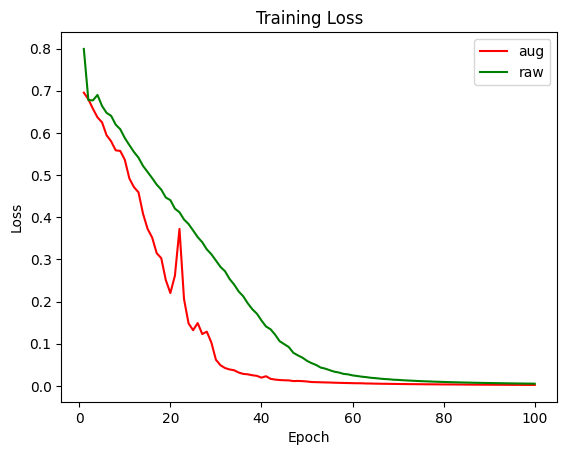

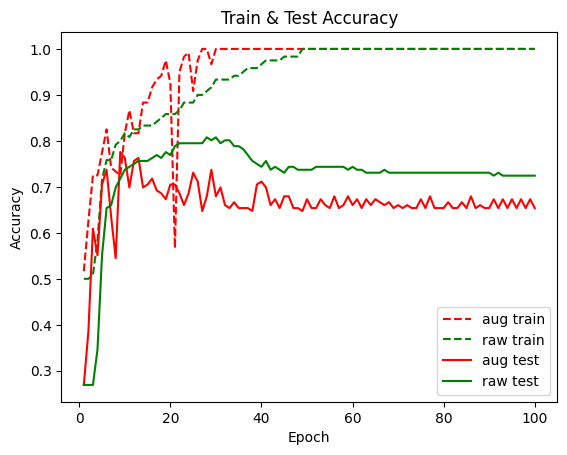

In [ ]:
plot_classifier_log(log_path="results/mlp")